# Exercise Set 1

## Exercise 1

### Import libraries

In [27]:
# import
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as ln

### Import data

In [28]:
# read in data
matrix = np.loadtxt('matrix_data.txt')
# dimensions
N = matrix.shape[0]

### Spectral radius

In [29]:
# compute eigenvalues
eigvals = ln.eigvals(matrix)
spectral_radius = max(abs(eigvals))
print("The spectral radius is:", round(spectral_radius, 6))

The spectral radius is: 1.004428


### Local spectral radious

In [50]:
# generate random positive vector
v = np.exp(np.random.randn(N))
max_iter = 100
iter_spectral_radius = np.zeros(max_iter)
for i in range(1, max_iter + 1):
    matrix_pwr = np.linalg.matrix_power(matrix, i)
    matrix_mult = np.matmul(matrix_pwr, v)
    iter_spectral_radius[i-1] = ln.norm(matrix_mult)**(1/i)

### Plot 

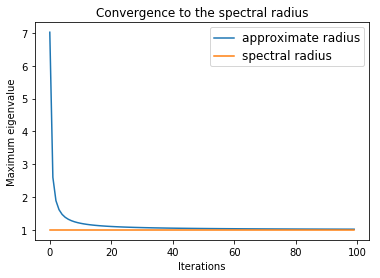

In [53]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(iter_spectral_radius[:], label = 'approximate radius')
ax.plot([spectral_radius] * max_iter, label = 'spectral radius')
legend = ax.legend(loc='upper right', shadow=False)
for label in legend.get_texts():
    label.set_fontsize('large')
plt.xlabel('Iterations')
plt.ylabel('Maximum eigenvalue')
plt.title('Convergence to the spectral radius')
plt.show()

## Exercise 2

In [55]:
from numba import njit
# Define the quad function

@njit
def quadratic():
    n = 100_000                # Number of data points
    x = np.zeros(n)            # Initialise x
    x[0] = np.random.uniform(0, 1)  # Initialise some x0
    for t in range(n - 1):
        x[t + 1] = 4 * x[t] * (1 - x[t])
    return x

### Plot histograms

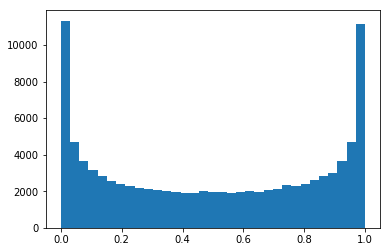

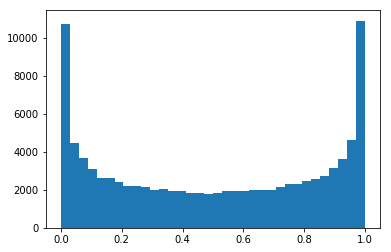

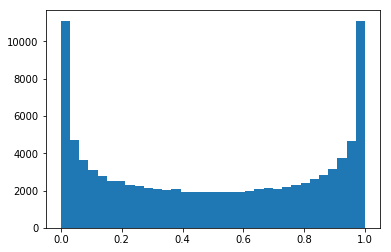

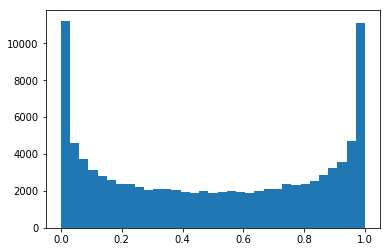

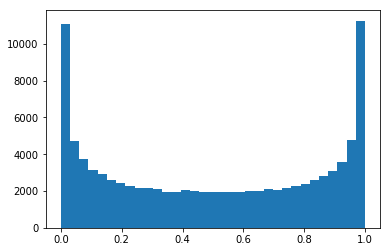

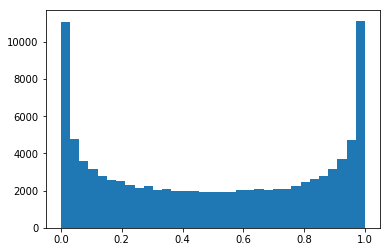

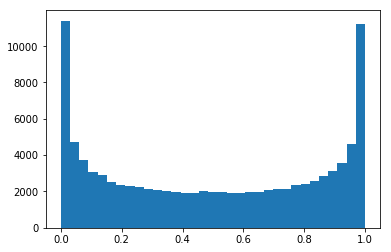

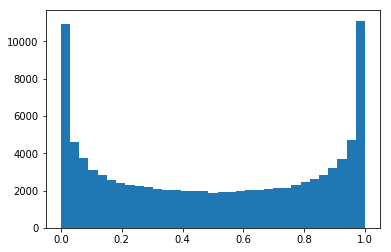

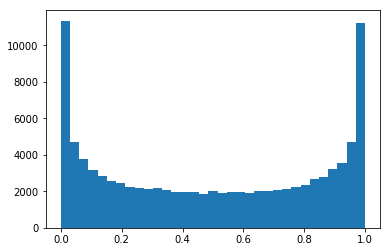

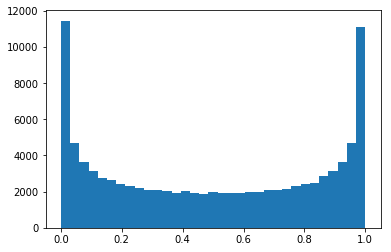

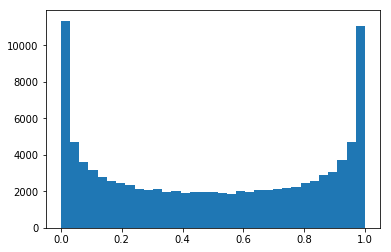

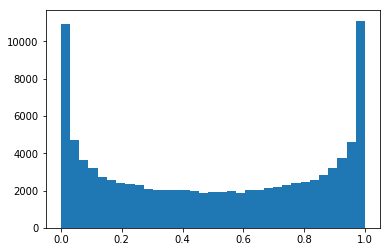

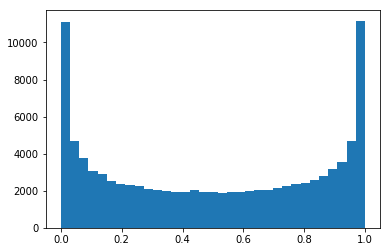

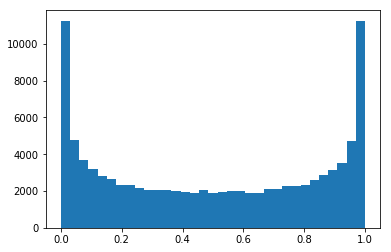

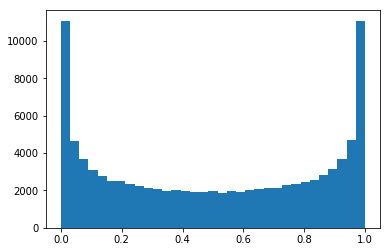

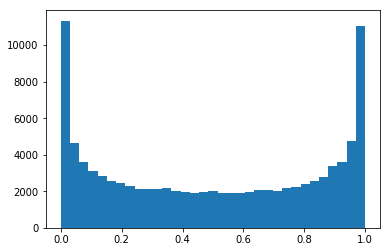

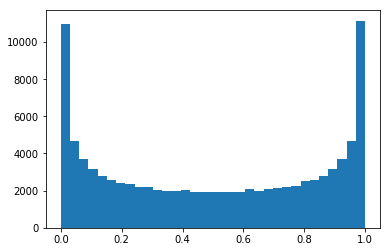

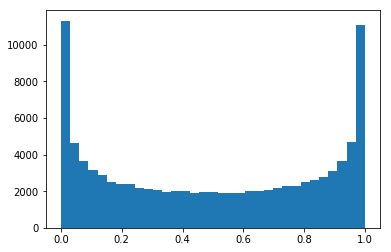

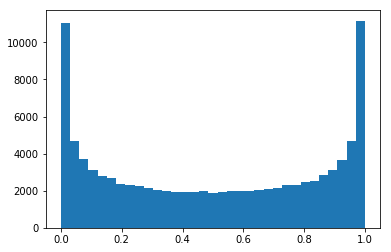

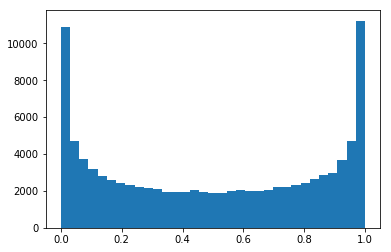

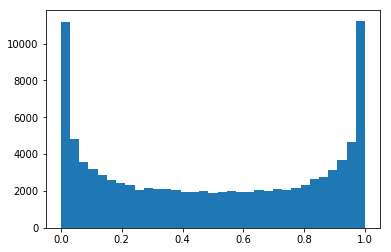

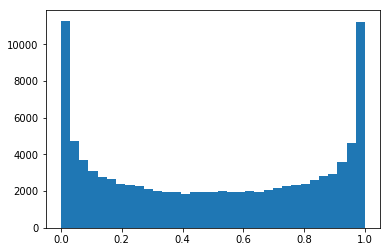

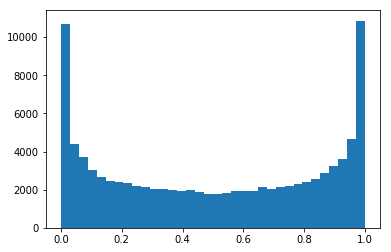

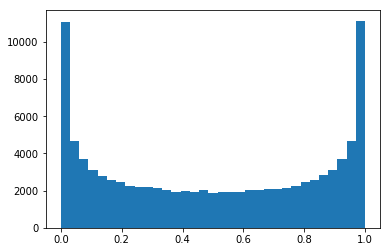

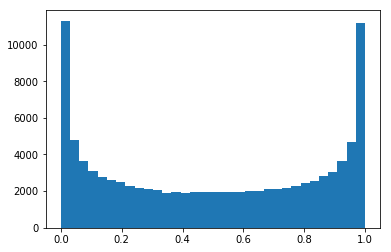

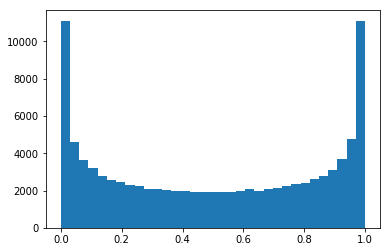

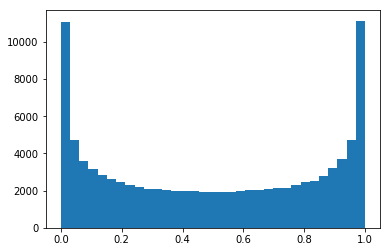

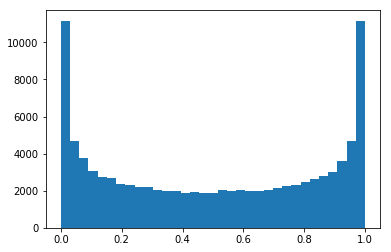

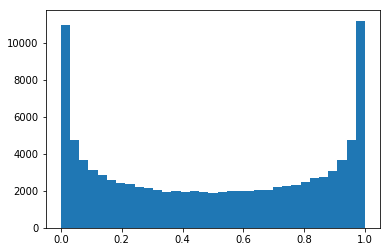

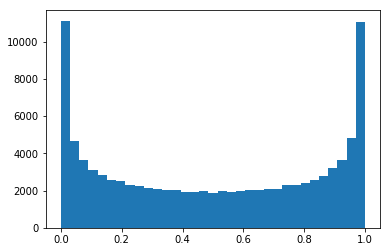

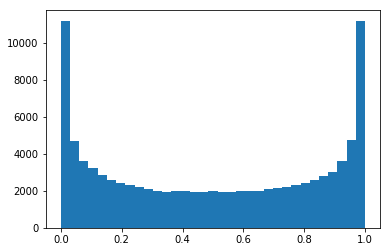

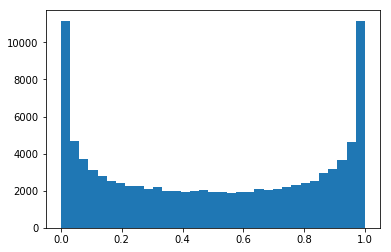

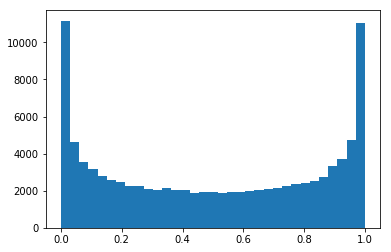

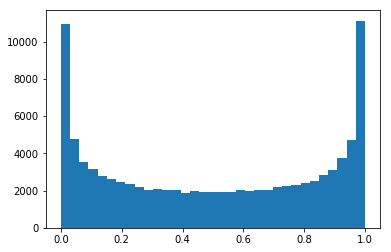

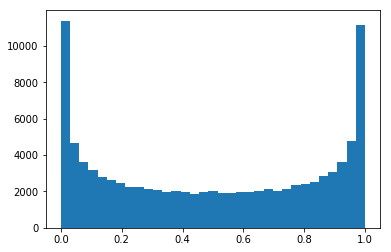

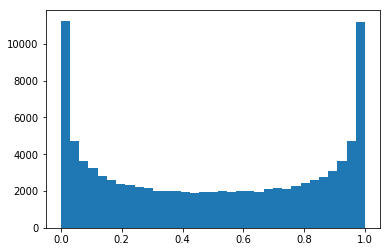

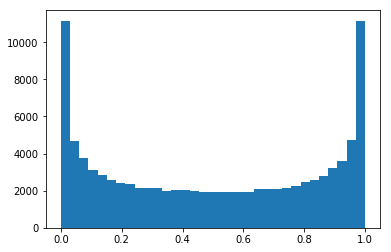

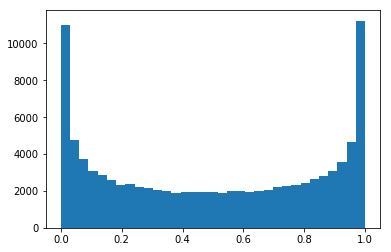

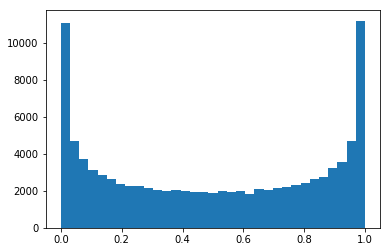

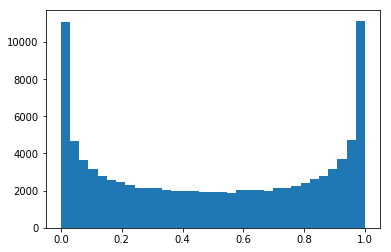

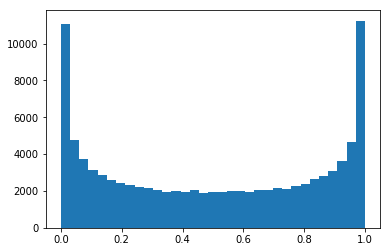

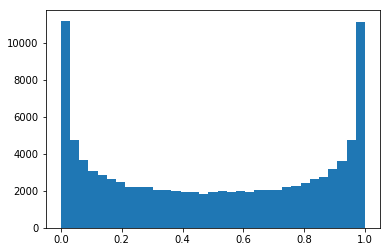

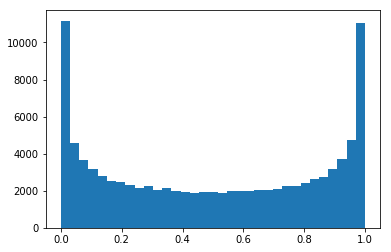

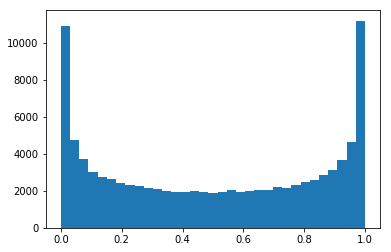

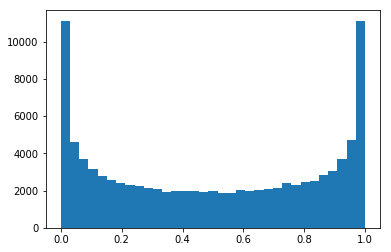

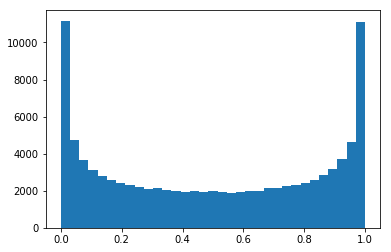

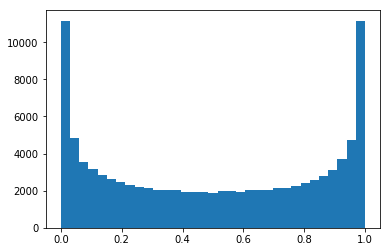

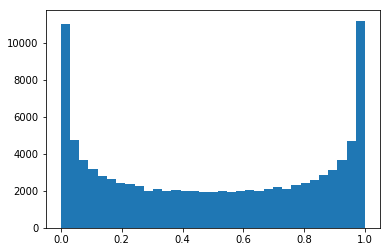

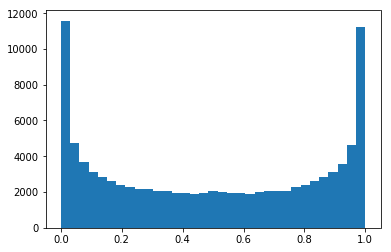

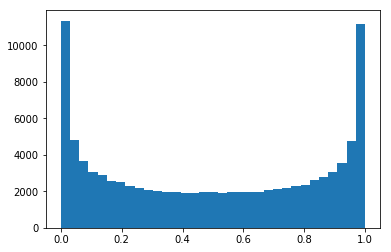

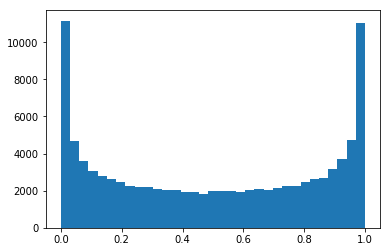

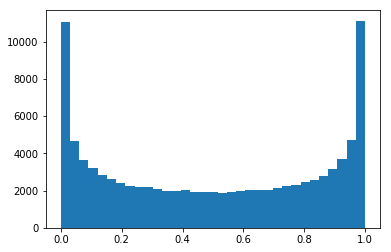

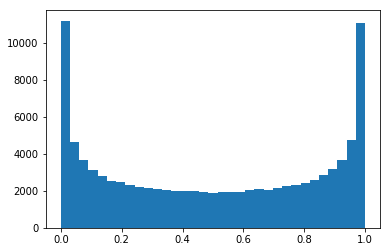

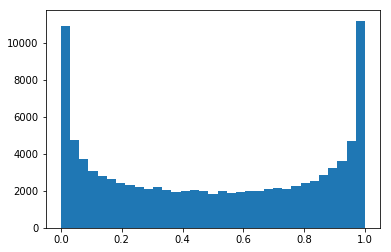

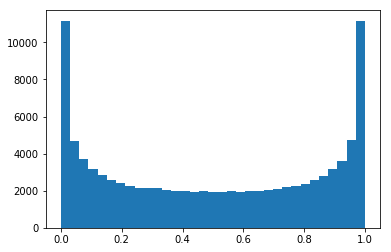

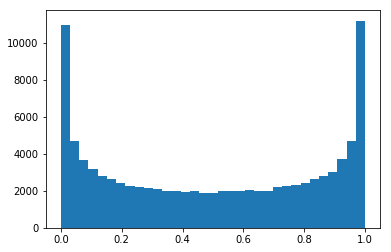

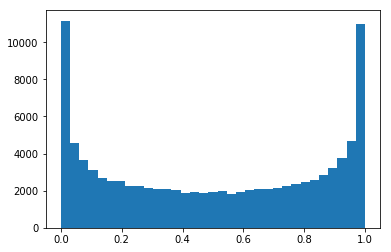

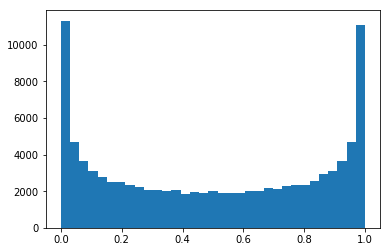

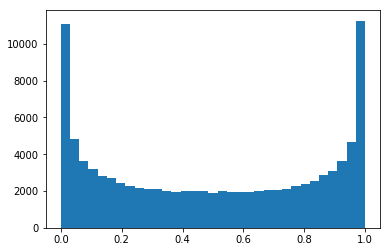

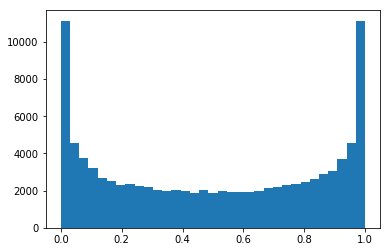

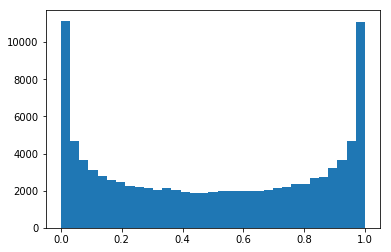

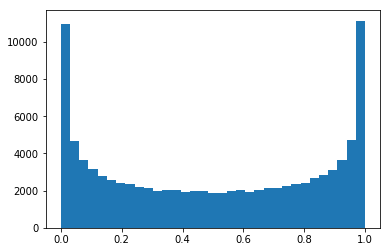

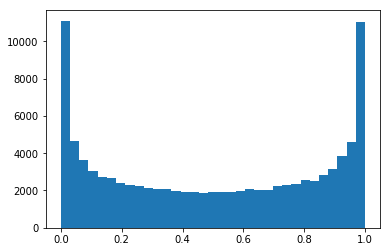

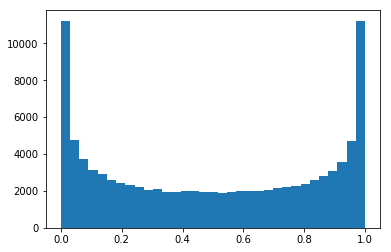

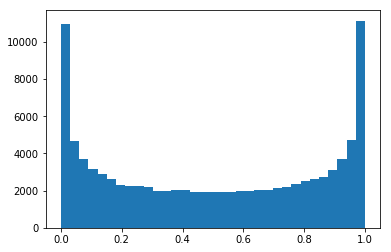

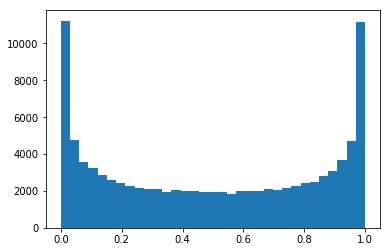

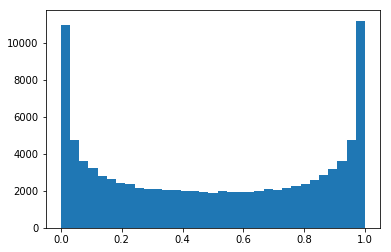

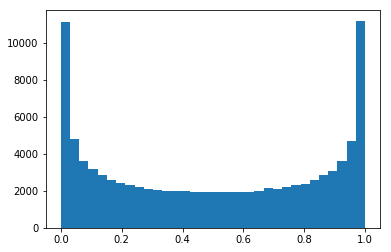

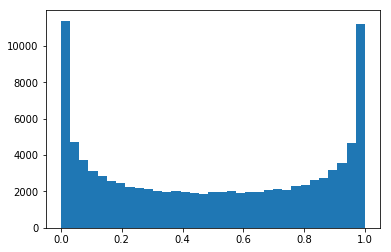

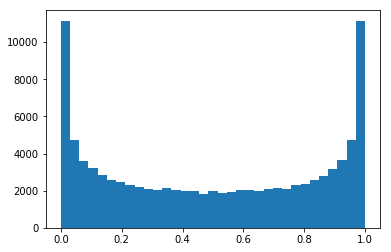

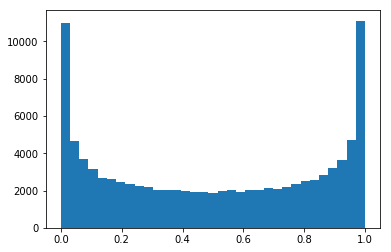

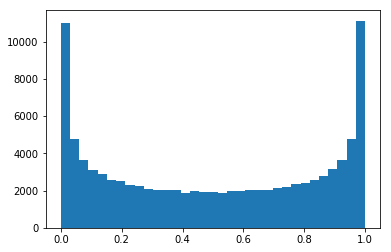

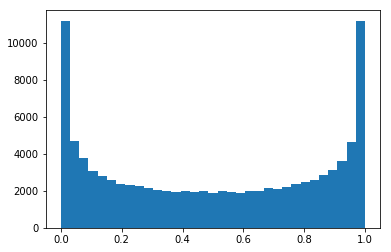

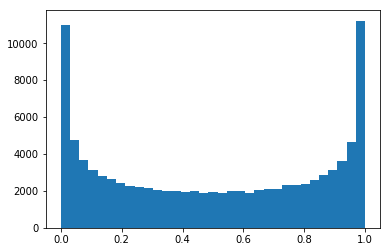

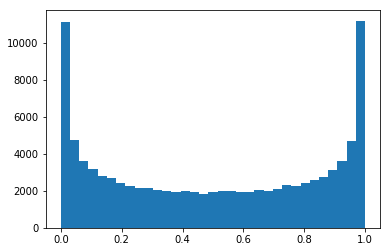

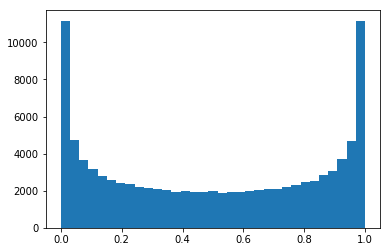

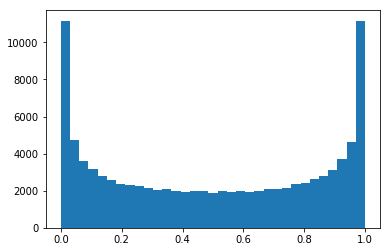

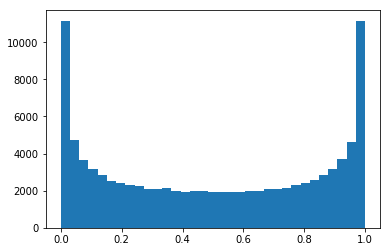

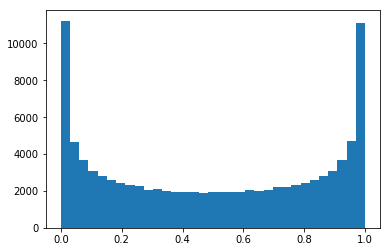

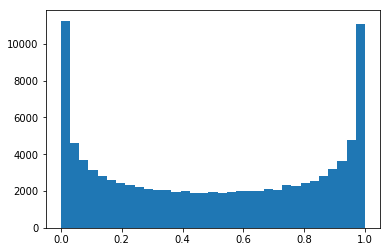

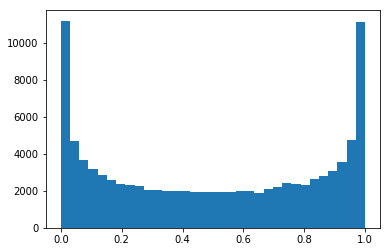

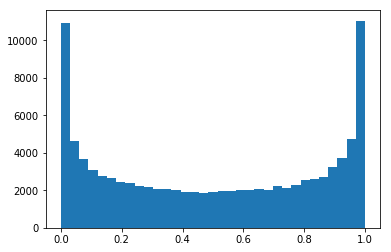

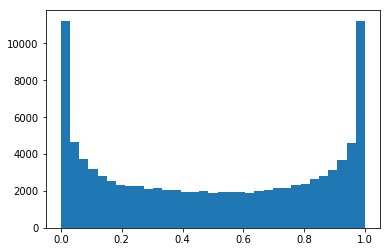

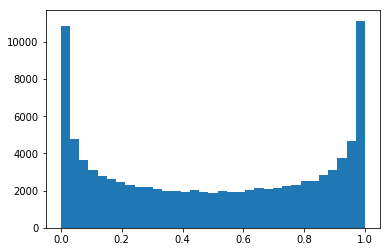

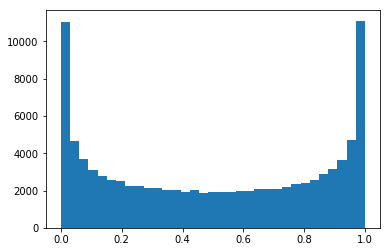

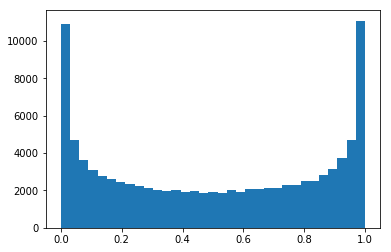

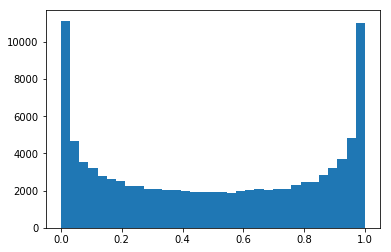

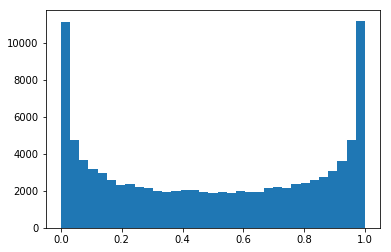

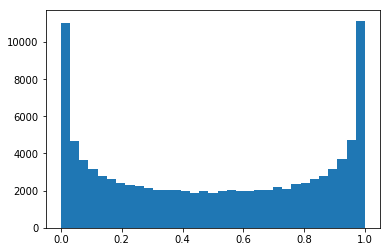

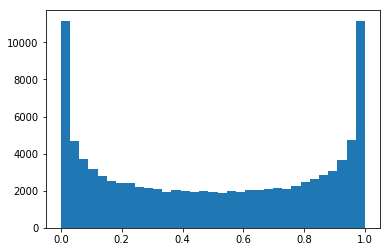

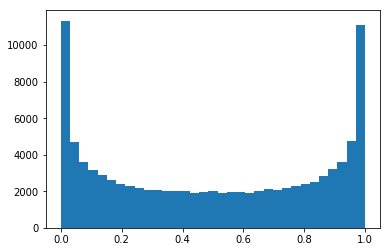

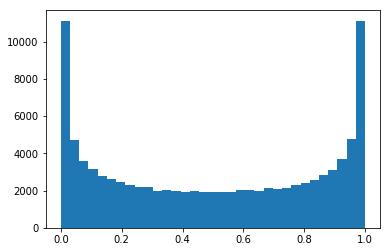

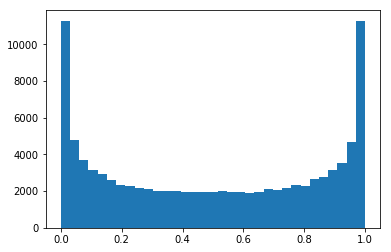

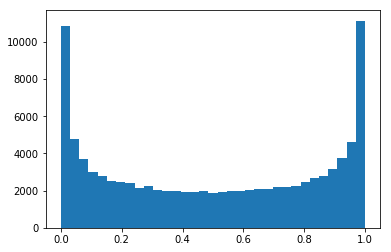

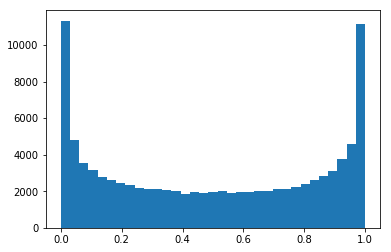

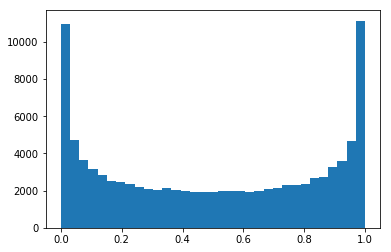

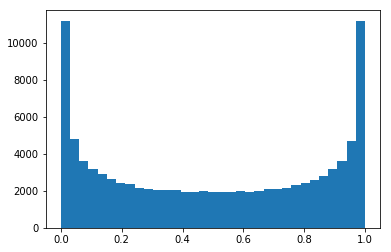

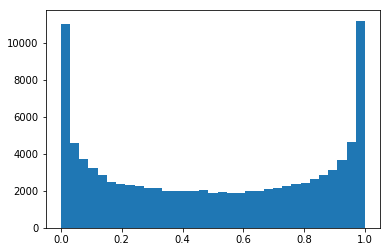

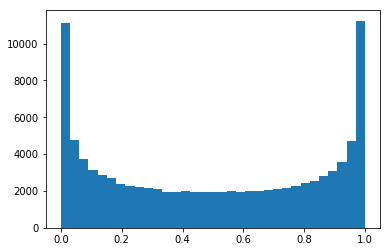

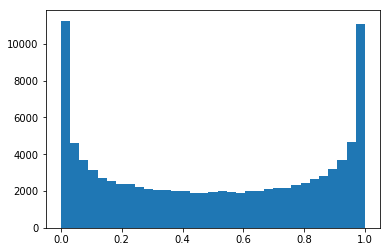

In [56]:
# Plot the quadratic function 100 times

for i in range(100):
    x = quadratic()
    plt.hist(x, bins='auto')
    plt.show()

## Exercise 3

Let $y\in C:=\{x\in\mathbb X: g^t(x)\to\hat x\}$.
Since $g$ is continuous at $\hat x$, and $g^{t-1}(y)\to\hat x$,
we have 
\begin{align*}
    \hat x&=\lim_{t\to\infty}g^t(x)=
    g(\lim_{t\to\infty}g^{t-1}(x))=g(\hat x).
\end{align*}
Therefore $\hat x$ is a steady state.